# Dimensionality Reduction
## Linear Dimensionality Reduction
### Principal Components Analysis

Principal Components Analysis (PCA) finds a new coordinate system for the feature space such that the first coordinate in this system represents the direction which accounts for the greatest proportion of variance in the feature space, the 2nd coordinate represents the direction which accounts for the second greatest proportion of variance in the feature space, and so on.

PCA is a linear dimensionality reduction technique in that both the space onto which the original data points are projected by the transformation and the transformation from the original data points itself are linear. It therefore satisfies:
1. $f(x+y) = f(x) + f(y)$
2. $f(\alpha x) = \alpha f(x)$

This method allows us to capture a significant proportion of the variation in the feature space in a space of much lower dimension.

We'll develop an intuition for the process by working with a 2-D dataset.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

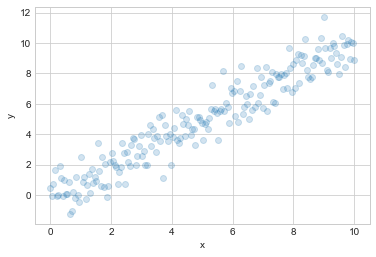

In [2]:
np.random.seed(42)
x = np.linspace(0, 10, 200).reshape((-1, 1))
noise = np.random.normal(scale=1, size=200).reshape((-1, 1))
X = np.hstack((x, x+noise))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight');

By construction, the principal axis of variation for this data is the line $y = x$: a perfectly linear relationship.

You can imagine both the $x$ and $y$ axes as features in a regular dataset. So we're not aiming to predict the values of $y$ given $x$, but rather to learn the *relationship* between these features. PCA is therefore an example of *unsupervised learning* (learning without respect to a specific set of targets).

We'll use `sklearn` to fit a PCA estimator:

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

The `PCA` fit learns crucial properties of the relationship between $x$ and $y$. The first is the *components*, or principal axes in the feature space, which represent the directions of maximum variation in the feature set.

In [5]:
print(pca.components_)
print(np.array([['a', 'b'], ['c', 'd']]))

[[ 0.68110472  0.73218602]
 [ 0.73218602 -0.68110472]]
[['a' 'b']
 ['c' 'd']]


The `components_` array has shape `(n_components, n_features)`. The row vectors in this array give the directions of maximum variation, ordered by the amount of variation explained. The second core property is the *explained variance*, which is the amount of variance explained by each of the *components*

In [6]:
print(pca.explained_variance_)
pca.explained_variance_ / sum(pca.explained_variance_)

[17.76054495  0.41074874]


array([0.97739573, 0.02260427])

We can also obtain these figures as percentages of the total variance:

In [8]:
pca.explained_variance_ratio_

array([0.97739573, 0.02260427])

Since we have selected `n_components` equal to `n_features`, the explained variance ratios must sum to one.

One of the quickest ways to intuitively understand what PCA is achieving is to visualise the components over the original data. The visualization is as follows:
1. The components define the **direction** of the vector.
2. The explained variance define the **length** of the vector.

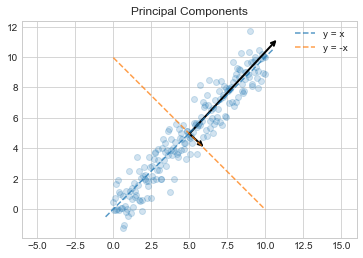

In [9]:
def draw_vector(v0, v1, ax):
    """
    Draw a vector from point v0 (x0, y0) to point v1 (x1, y1).
    
    :param v0: x, y coords of point v0
    :param v1: x, y coords of point v1
    :param ax: axes object to add vector 
    """
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0,
                arrowprops=arrowprops,
                label='component')

# plot the features
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
# annotate the vectors of the principal components 
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, plt.gca())

# annotate the lines y = x and y = -x
# these should approximate the direction of the components
ax = plt.gca()
xmin, xmax = ax.get_xlim()
xline = np.linspace(xmin, xmax, 100)
neg_xline = np.linspace(0, 10, 100)
ax.plot(xline, xline, '--', alpha=0.75, zorder=10, label='y = x')
ax.plot(neg_xline, -neg_xline + sum(pca.mean_), 
        '--', alpha=0.75, zorder=10, label='y = -x')
ax.legend()
plt.title('Principal Components')
plt.axis('equal');

The vectors represent the principal directions along which the data vary, with their length scaled according to the importance of the axis in explaining total variation in the data.

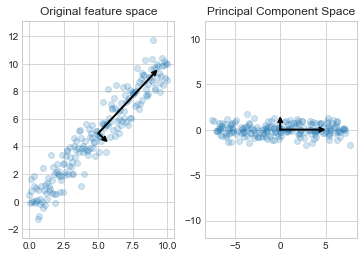

In [10]:
fig, ax = plt.subplots(1, 2)

# plot the original features
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
ax[0].axis('equal')
ax[0].set_title('Original feature space')
# annotate the vectors of the principal components 
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 1.5 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax[0])

# now plot the transformed features
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
ax[1].axis('equal')
ax[1].set_title('Principal Component Space')
# annotate the vectors of the principal components 
draw_vector([0, 0], [0, 1.5], ax[1])
draw_vector([0, 0], [5, 0], ax[1])
    

We motivated Principal components an a *dimensionality reduction* technique, allowing us to express much of the important variation in a set of features with a *lower-dimensional collection of components*. 

Let's take an introductory look at this process for our dummy dataset. We fit a number of components strictly less than the number of features:

In [220]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data is one-dimensional. We perform the inverse transform to recover the components as a projection in the original feature space.

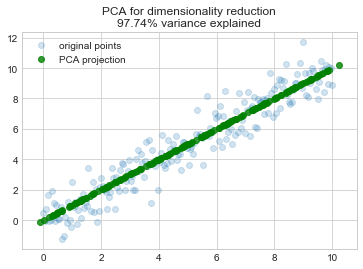

In [241]:
X_pca_inverse = pca.inverse_transform(X_pca)
var_explained = pca.explained_variance_ratio_[0]
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, label='original points')
plt.scatter(X_pca_inverse[:, 0], X_pca_inverse[:, 0],
            alpha=0.8, c='green', label='PCA projection')
plt.legend()
plt.title('PCA for dimensionality reduction\n'
          f'{var_explained*100:.2f}% variance explained');

In the above example we explained over 97% of variance in the features with just 50% of the variation!

**Exercise:** What is a potential pitfall of using unsupervised dimensionality reduction in the context of a supervised classification or regression problem (for example, to reduce the dimensionality of the feature space prior to modelling)?

## Non-Linear Dimensionality Reduction
### t-SNE
### t-Distributed Stochastic Neighbourhood Embedding

Manifold learning is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high. Points in a high-dimensional space may adhere to a manifold: a subset of the original space that is locally Euclidean.

Consider the problem of representing the globe of the earth as a flat chart. This can be done, but requires two charts to represent the entire globe.

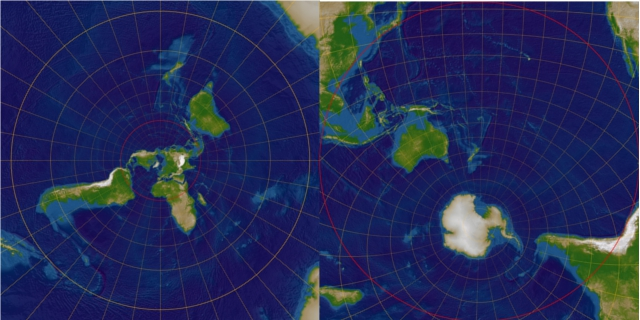

We'll look at a slightly simplified version of this problem, where our data are samples of points on the surface of a sphere, but with its poles cut out, as well as a thin slice down its side. *This allows manifold learning techniques to spread the data open as they project it onto two dimensions*.

In [11]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn.utils import check_random_state

# Variables for manifold learning.
n_neighbors = 10
n_samples = 1000

# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), \
    np.cos(t[indices])

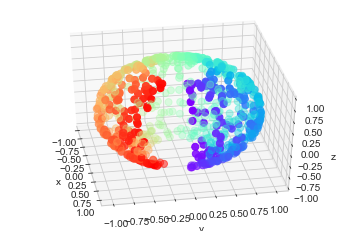

In [12]:
from ipywidgets import interact, fixed

def plot_3D(x, y, z, c, elev=40, azim=-10):
    """
    Plots a curve in 3D space, points coloured by c.
    """
    ax = plt.subplot(projection='3d')
    ax.scatter3D(x, y, z, c=c, s=50, cmap=plt.cm.rainbow)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
plot_3D(x, y, z, colors)

We can generate an interactive version of the plot too.

In [13]:
interact(plot_3D, elev=[40], azip=(-180, 180),
         x=fixed(x), y=fixed(y), z=fixed(z), c=fixed(colors));

interactive(children=(Dropdown(description='elev', options=(40,), value=40), IntSlider(value=-10, description=…

The first and seconds equations model the similarity of data points in the original space.

$
p_{j\mid i}={\frac {\exp(-\lVert \mathbf {x} _{i}-\mathbf {x} _{j}\rVert ^{2}/2\sigma _{i}^{2})}{\sum _{k\neq i}\exp(-\lVert \mathbf {x} _{i}-\mathbf {x} _{k}\rVert ^{2}/2\sigma _{i}^{2})}}
$

$
p_{ij}={\frac {p_{j\mid i}+p_{i\mid j}}{2N}}
$

The next equation models the similarity between points in the transformed space:

$
q_{ij}={\frac {(1+\lVert \mathbf {y} _{i}-\mathbf {y} _{j}\rVert ^{2})^{-1}}{\sum _{k\neq l}(1+\lVert \mathbf {y} _{k}-\mathbf {y} _{l}\rVert ^{2})^{-1}}}
$

The last equation models the divergence in distribution between similarities of points in the original space and similarities of points in the transformed space:

$
{\displaystyle KL(P||Q)=\sum _{i\neq j}p_{ij}\log {\frac {p_{ij}}{q_{ij}}}}
$

In [14]:
sphere_data = np.array([x, y, z]).T
# Perform t-distributed stochastic neighbor embedding.
t0 = time()
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
trans_data = tsne.fit_transform(sphere_data).T
t1 = time()
print("t-SNE run time: %.2g sec" % (t1 - t0))

t-SNE run time: 9.5 sec


Text(0.5,1,'t-SNE embedding of data')

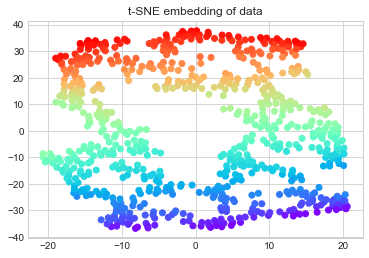

In [15]:
plt.scatter(trans_data[0], trans_data[1],
            c=colors, cmap=plt.cm.rainbow)
plt.title('t-SNE embedding of data')

t-SNE is now a highly popular and effective method for non-linear dimensionality reduction. However, the following points should be noted:
1. The algorithm is non-deterministic. Unlike PCA, which will always yield the same components, different random initializations can lead to different embeddings.
2. Run-time is higher than other dimensionality reduction techniques. 
3. At numbers of observations in the hundreds of thousands, the algorithms starts to become computationally intractable.

Lets check up on this excellent [Distill write-up](https://distill.pub/2016/misread-tsne/) for further important properties. 

**Exercise:** Apply both PCA and t-SNE to the MNIST data. Visualize your results. Bear in mind the importance of scaling your data for PCA and the recommendation for t-SNE with very high-dimensional data to first reduce the data to an intermediate number of dimensions (for instance, using PCA to first reduce the data to tens of features).

We'll give a brief look into the dataset below:

In [308]:
from sklearn.datasets import load_digits
from sklearn import random_projection
from matplotlib import offsetbox

digits = load_digits()
from keras.datasets import mnist

# This data is for illustration purposes. See end for final dataset
digits = load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30
print(f'n_samples: {n_samples}, n_features: {n_features}')
print(f'n_classes: {len(set(y))}')

n_samples: 1797, n_features: 64
n_classes: 10


In [309]:
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

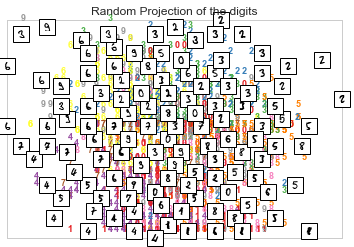

In [310]:
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")

The following was an illustration. You should use this data:

In [311]:
from keras.datasets import mnist

(_, _), (X, y) = mnist.load_data()
X = X.reshape((10000, 28*28)) / 255.0
n_samples, n_features = X.shape

print(f'n_samples: {n_samples}, n_features: {n_features}')
print(f'n_classes: {len(set(y))}')

n_samples: 10000, n_features: 784
n_classes: 10
